In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

from skimage import io
from skimage.filters import threshold_otsu, gaussian
from skimage.morphology import label
from scipy import ndimage as ndi
from skimage.morphology import watershed
from skimage.feature import peak_local_max


#my functions
from preprocess import subtract_channels, z_project

warnings.filterwarnings(action="ignore")

In [2]:
image = io.imread("../test-images/wholemount_test.tif")
print(image.shape)
image = image[2:,:,:,:]
print(image.shape)
sub_image = subtract_channels(image)
flat_image = z_project(sub_image[0:8,:,:,:])

(14, 790, 936, 3)
(12, 790, 936, 3)


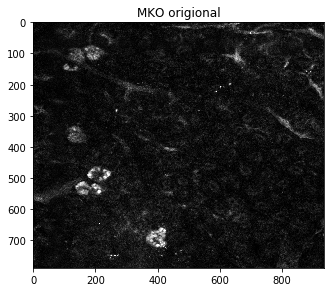

In [3]:
io.imshow(image[2,:,:,2])
plt.title("MKO origional")
plt.show()

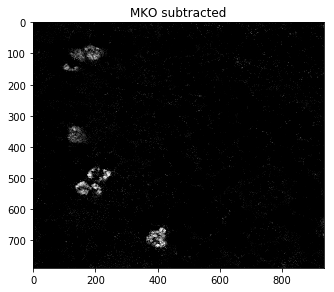

In [4]:
io.imshow(sub_image[2,:,:,2])
plt.title("MKO subtracted")
plt.show()

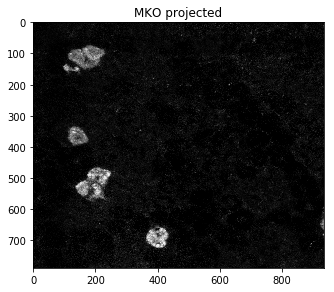

In [5]:
io.imshow(flat_image[:,:,2])
plt.title("MKO projected")
plt.show()

In [6]:
gaus_image = gaussian(flat_image, sigma=3)

new_image = np.zeros(gaus_image.shape)

for channel in range(gaus_image.shape[2]):
    thresh = threshold_otsu(gaus_image[:,:,channel])
    binary = gaus_image[:,:,channel] > thresh
    new_image[:,:,channel] = ndi.binary_fill_holes(binary)

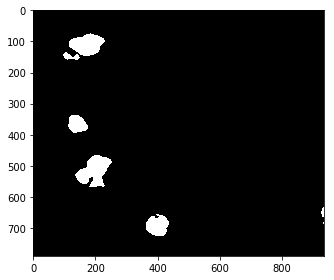

In [7]:
io.imshow(new_image[:,:,2])

In [8]:
distance = ndi.distance_transform_edt(new_image[:,:,2])
local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((3, 3)), labels=new_image[:,:,2])
markers = ndi.label(local_maxi)[0]
labels = watershed(-distance, markers, mask=new_image[:,:,2])

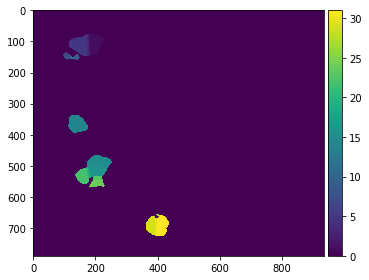

In [9]:
io.imshow(labels)